In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random

In [ ]:
global input_size, output_price, input_no_of_rooms

input_size = np.array([
    2, 5, 7, 9, 10 , 1, 11, 25, 14, 20, 21, 4, 8, 14
])

input_no_of_rooms = np.array([
    1, 2, 3, 2, 1, 2, 3, 3, 2, 2, 2, 1, 1, 2
])

output_price = np.array([
    12, 25, 17, 6, 20 , 11, 21, 22, 30, 29, 35, 38, 30, 32
])

print(input_size.shape)
print(input_no_of_rooms.shape)
print(output_price.shape)

(14,)
(14,)
(14,)


In [57]:
# global theta_0, theta_1, theta_2

theta_0 = random.randn()
theta_1 = random.randn()
theta_2 = random.randn()

def print_hypothesis(theta_0, theta_1, theta_2):
  print('theta_0 = ', theta_0)
  print('theta_1 = ', theta_1)
  print(f'hypothesis = {theta_0} + ({theta_1}) * x1 + ({theta_2}) * x2')

print_hypothesis(theta_0, theta_1, theta_2)

theta_0 =  -1.1899749848548227
theta_1 =  -0.0449184677181649
hypothesis = -1.1899749848548227 + (-0.0449184677181649) * x1 + (0.19298088957273282) * x2


(25, 25)
(25, 25)


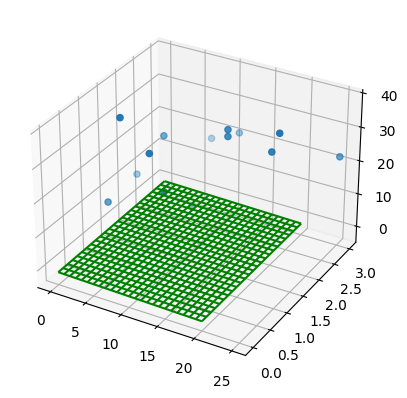

In [59]:
ax = plt.axes(projection = '3d')

x = np.linspace(0, 20, 25)
y = np.linspace(0, 3, 25)
X, Y = np.meshgrid(x, y)

print(X.shape)
print(Y.shape)

Z = theta_0 + (X * theta_1) + (Y * theta_2)
ax.plot_wireframe(X, Y, Z, color='green')
ax.scatter(input_size, input_no_of_rooms, output_price)
plt.show()

In [ ]:
def loss_function(input_size, input_no_of_rooms, output_price, theta_0, theta_1, theta_2):
    m = len(input_size)
    loss = np.sum(((theta_0 + (theta_1 * input_size) + (theta_2 * input_no_of_rooms)) - output_price) ** 2) / (2 * m)
    return loss

loss_function(input_size, input_no_of_rooms, output_price, theta_0, theta_1, theta_2)

4895.562211943244

In [ ]:
def gradient_descent(input_size, input_no_of_rooms, output_price, theta_0, theta_1, theta_2):
  alpha = 0.001
  m = len(input_size)
  for i in range(1000):
    if (i % 100 == 0):
      print(f'Iteration {i}: Loss: {loss_function(input_size, input_no_of_rooms, output_price, theta_0, theta_1, theta_2)}')
    x = np.linspace(0, 20, 25)
    y = np.linspace(0, 3, 25)
    X, Y = np.meshgrid(x, y)
    Z = theta_0 + (theta_1 * X) + (theta_2 * Y)
    ax.scatter(input_size, input_no_of_rooms, output_price)
    ax.plot_wireframe(X, Y, Z, color='green')

    sum_theta_0 = 0
    sum_theta_1 = 0
    sum_theta_2 = 0
    
    for j in range(len(input_size)):
      sum_theta_0 = sum_theta_0 + (((theta_0 + (theta_1 * input_size[j]) + (theta_2 * input_no_of_rooms[j])) - output_price[j]) * 1)
      sum_theta_1 = sum_theta_1 + (((theta_0 + (theta_1 * input_size[j]) + (theta_2 * input_no_of_rooms[j])) - output_price[j]) * input_size[j])
      sum_theta_2 = sum_theta_2 + (((theta_0 + (theta_1 * input_size[j]) + (theta_2 * input_no_of_rooms[j])) - output_price[j]) * input_no_of_rooms[j])

    theta_0 = theta_0 - (alpha * (sum_theta_0 / m))
    theta_1 = theta_1 - (alpha * (sum_theta_1 / m))
    theta_2 = theta_2 - (alpha * (sum_theta_2 / m))

  return theta_0, theta_1, theta_2

Iteration 0: Loss: 4895.562211943244
Iteration 100: Loss: 1148.46804400104
Iteration 200: Loss: 1087.5888649805324
Iteration 300: Loss: 1037.973970577832
Iteration 400: Loss: 997.2312498106055
Iteration 500: Loss: 963.4834534067692
Iteration 600: Loss: 935.2572450301961
Iteration 700: Loss: 911.3961636799532
Iteration 800: Loss: 890.9923439870815
Iteration 900: Loss: 873.3329517549405


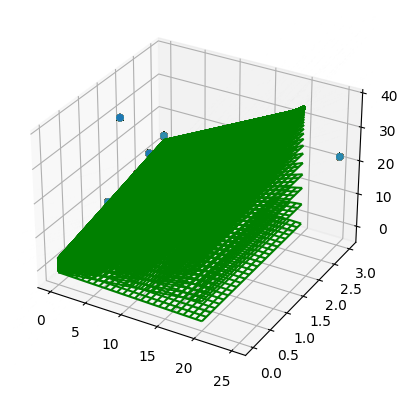

In [72]:
ax = plt.axes(projection = '3d')
new_theta_0, new_theta_1, new_theta_2 = gradient_descent(input_size, input_no_of_rooms, output_price, theta_0, theta_1, theta_2)
ax.scatter(input_size, input_no_of_rooms, output_price)
plt.show()


In [73]:
def predict_price(size, no_of_rooms):
  return (new_theta_0 + (new_theta_1 * size) + (new_theta_2 * no_of_rooms))

print(predict_price(8, 2))

17.663152140504817
